<a href="https://colab.research.google.com/github/sigvehaug/CAS-Applied-Data-Science/blob/master/Module-1/M1-D3-MySQL-Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### MySQL Exercise

You have 45 minutes for this exercise. You will be randomly be assigned to class colleague and the two of get a separate virtual room where you can solve the exercise togehter. When you have finished, please return to the main virtual room.

If you both are in the same physical location, of course you don't have to use your virtual room.

**Task**
- Check if there is visible correlation between payment amount and postal code of the customer, i.e. make a scatter plot.  
- Calculate the total price for all orders in the database per product line.
How much you do in SQL directly and how much with dataframes is up to you. 

**Have fun and start here:**

- Study [MySQL-PDF.pdf](https://github.com/sigvehaug/CAS-Applied-Data-Science/raw/master/Module-1/M1-D2-DB/MySQL-PDF.pdf) in a different browser tab for an overview of the database to be used.
- Connect to the database classicmodels which is running on computer host.

mysql connector is not part of the default colab environment, so we need to install it.

In [ ]:
!pip install mysql-connector-python

In [ ]:
# mysql is in package "conda install mysql-connector-python"
import mysql.connector
import pandas as pd 
my_connect = mysql.connector.connect(
      host="fl-5-232.zhdk.cloud.switch.ch",
      port=3306,
      user="user",
      passwd="fum+Apheb4",
      #database='training'
      database="classicmodels"
    )
####### end of connection ####


Now check that you can read the tables:

In [ ]:
df_prodline = pd.read_sql("SELECT productLine FROM productlines",my_connect)
df_prodline

,productLine
0,Classic Cars
1,Motorcycles
2,Planes
3,Ships
4,Trains
5,Trucks and Buses
6,Vintage Cars


Now continue with your task!

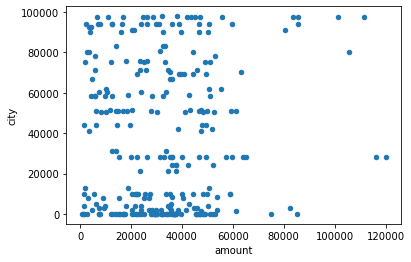

In [ ]:
# Scatter plot showing payment amount versus postal code
# Your code comes here
df_dates = pd.read_sql("SELECT customerNumber, amount FROM payments",my_connect)
#df_dates['city'] = ''
cities = []
for i in range(0,len(df_dates)): 
    x1   = df_dates.loc[i][0]   
    qry = "SELECT postalCode FROM customers WHERE customerNumber='"+str(x1)+"'"
    df_cities = pd.read_sql(qry,my_connect)
    try:
        cities.append(int(df_cities.iloc[0,0]))
    except: # No good postal number was ther
        cities.append(0)
df_dates['city'] = cities
df_dates.plot.scatter(x='amount',y='city')


In [ ]:
# One possibility getting total price for all orders per product line
# Your code comes here
print('Total price for all orders per product line:\n')
for i in range(0,len(df_prodline)): 
    x1   = df_prodline.loc[i][0]
    #print(x1)
    qry = "SELECT productcode FROM products WHERE productline='"+x1+"'"
    df_prodcode = pd.read_sql(qry,my_connect)
    PriceTot    = 0
    for j in range(0,len(df_prodcode)):
        x2   = df_prodcode.loc[j][0]
        #print(x1,x2)
        qry = "SELECT priceEach FROM orderdetails WHERE productcode='"+x2+"'"
        df_orddet = pd.read_sql(qry,my_connect)
        for k in range(0,len(df_orddet)):
            x3   = df_orddet.loc[k][0]
            #print(x1,x2,x3)
            PriceTot+=x3
    print('%20s %10.2f USD'%(x1,PriceTot))

Total price for all orders per product line:

        Classic Cars  109084.52 USD
         Motorcycles   31348.93 USD
              Planes   26989.94 USD
               Ships   19049.25 USD
              Trains    5438.38 USD
    Trucks and Buses   28554.45 USD
        Vintage Cars   51479.95 USD


What is potentially very bad about this solution?

### NB

The server with the database used in this notebook will be shut down tonight. However, installing a mysql data server on your own laptop is quite easy. Google is your friend. It takes maybe 1h for a beginner, 10min for an experienced.